In [1]:
import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as pyplot
import seaborn as sns
from keras.layers import BatchNormalization

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
Image_size = 100
Batch = 32

In [5]:


Image_size = 100
batch_size = 32
train_ds = keras.utils.image_dataset_from_directory(
    directory ="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training",
    labels = "inferred",
    label_mode = 'int',
    image_size=(Image_size, Image_size),
    batch_size = batch_size,
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test",
    labels = "inferred",
    label_mode = 'int',
    image_size=(Image_size, Image_size),
    batch_size = batch_size,
)


Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.


In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range = 15,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')
                
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory ="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training",
    target_size = (Image_size,Image_size),
    shuffle = True,
    batch_size = 32,
    class_mode = 'sparse'
)

test_generator = test_datagen.flow_from_directory(
    directory ="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test",
    target_size = (Image_size,Image_size),
    shuffle = False,
    batch_size = 32,
    class_mode = "sparse"
    
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [7]:
class_train_name = os.listdir("/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training")
print(class_train_name)

['Quince', 'Grapefruit White', 'Granadilla', 'Orange', 'Apple Red 3', 'Grape White 2', 'Corn Husk', 'Tamarillo', 'Banana Red', 'Nectarine Flat', 'Pepper Yellow', 'Nut Forest', 'Pear Monster', 'Fig', 'Tomato Heart', 'Onion Red Peeled', 'Lemon Meyer', 'Onion Red', 'Passion Fruit', 'Cucumber Ripe', 'Cactus fruit', 'Tomato not Ripened', 'Mango Red', 'Apple Pink Lady', 'Pomegranate', 'Plum', 'Pineapple', 'Tomato 1', 'Cherry 2', 'Apple Red 2', 'Avocado ripe', 'Dates', 'Maracuja', 'Papaya', 'Nut Pecan', 'Pear Stone', 'Cherry Wax Yellow', 'Eggplant', 'Apple Golden 2', 'Guava', 'Beetroot', 'Tomato Maroon', 'Potato Red', 'Apple Red Delicious', 'Cherry Wax Red', 'Kiwi', 'Cherry Wax Black', 'Limes', 'Cantaloupe 2', 'Apple Braeburn', 'Pear', 'Carambula', 'Tomato 3', 'Onion White', 'Cherry 1', 'Strawberry', 'Lychee', 'Redcurrant', 'Rambutan', 'Potato Red Washed', 'Tomato 4', 'Hazelnut', 'Tomato Yellow', 'Plum 3', 'Grape White', 'Pineapple Mini', 'Mulberry', 'Grape Blue', 'Pear Abate', 'Melon Piel de

In [8]:
class_test_name = os.listdir("/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test")
print(class_test_name)

['Quince', 'Grapefruit White', 'Granadilla', 'Orange', 'Apple Red 3', 'Grape White 2', 'Corn Husk', 'Tamarillo', 'Banana Red', 'Nectarine Flat', 'Pepper Yellow', 'Nut Forest', 'Pear Monster', 'Fig', 'Tomato Heart', 'Onion Red Peeled', 'Lemon Meyer', 'Onion Red', 'Passion Fruit', 'Cucumber Ripe', 'Cactus fruit', 'Tomato not Ripened', 'Mango Red', 'Apple Pink Lady', 'Pomegranate', 'Plum', 'Pineapple', 'Tomato 1', 'Cherry 2', 'Apple Red 2', 'Avocado ripe', 'Dates', 'Maracuja', 'Papaya', 'Nut Pecan', 'Pear Stone', 'Cherry Wax Yellow', 'Eggplant', 'Apple Golden 2', 'Guava', 'Beetroot', 'Tomato Maroon', 'Potato Red', 'Apple Red Delicious', 'Cherry Wax Red', 'Kiwi', 'Cherry Wax Black', 'Limes', 'Cantaloupe 2', 'Apple Braeburn', 'Pear', 'Carambula', 'Tomato 3', 'Onion White', 'Cherry 1', 'Strawberry', 'Lychee', 'Redcurrant', 'Rambutan', 'Potato Red Washed', 'Tomato 4', 'Hazelnut', 'Tomato Yellow', 'Plum 3', 'Grape White', 'Pineapple Mini', 'Mulberry', 'Grape Blue', 'Pear Abate', 'Melon Piel de

In [9]:
len(class_test_name)

131

In [10]:
len(class_train_name)

131

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(class_train_name)

class_train_labels = le.transform(class_train_name) # we have got an array class_train_labels

n = len(class_train_name)

for i in range(len(class_train_name)):
    print(f"{class_train_name[i]}->{class_train_labels[i]}")



Quince->111
Grapefruit White->51
Granadilla->43
Orange->77
Apple Red 3->9
Grape White 2->47
Corn Husk->36
Tamarillo->118
Banana Red->18
Nectarine Flat->71
Pepper Yellow->96
Nut Forest->72
Pear Monster->88
Fig->41
Tomato Heart->125
Onion Red Peeled->75
Lemon Meyer->60
Onion Red->74
Passion Fruit->79
Cucumber Ripe->37
Cactus fruit->21
Tomato not Ripened->128
Mango Red->65
Apple Pink Lady->6
Pomegranate->105
Plum->102
Pineapple->99
Tomato 1->120
Cherry 2->27
Apple Red 2->8
Avocado ripe->15
Dates->39
Maracuja->67
Papaya->78
Nut Pecan->73
Pear Stone->90
Cherry Wax Yellow->31
Eggplant->40
Apple Golden 2->3
Guava->52
Beetroot->19
Tomato Maroon->126
Potato Red->107
Apple Red Delicious->10
Cherry Wax Red->30
Kiwi->56
Cherry Wax Black->29
Limes->61
Cantaloupe 2->23
Apple Braeburn->0
Pear->83
Carambula->24
Tomato 3->122
Onion White->76
Cherry 1->26
Strawberry->116
Lychee->62
Redcurrant->114
Rambutan->112
Potato Red Washed->108
Tomato 4->123
Hazelnut->53
Tomato Yellow->127
Plum 3->104
Grape White-

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(class_test_name)

class_test_labels = le.transform(class_test_name)

n = len(class_test_name)
for i in range(len(class_test_name)):
    print(f"{class_test_name[i]}->{class_test_labels[i]}")

Quince->111
Grapefruit White->51
Granadilla->43
Orange->77
Apple Red 3->9
Grape White 2->47
Corn Husk->36
Tamarillo->118
Banana Red->18
Nectarine Flat->71
Pepper Yellow->96
Nut Forest->72
Pear Monster->88
Fig->41
Tomato Heart->125
Onion Red Peeled->75
Lemon Meyer->60
Onion Red->74
Passion Fruit->79
Cucumber Ripe->37
Cactus fruit->21
Tomato not Ripened->128
Mango Red->65
Apple Pink Lady->6
Pomegranate->105
Plum->102
Pineapple->99
Tomato 1->120
Cherry 2->27
Apple Red 2->8
Avocado ripe->15
Dates->39
Maracuja->67
Papaya->78
Nut Pecan->73
Pear Stone->90
Cherry Wax Yellow->31
Eggplant->40
Apple Golden 2->3
Guava->52
Beetroot->19
Tomato Maroon->126
Potato Red->107
Apple Red Delicious->10
Cherry Wax Red->30
Kiwi->56
Cherry Wax Black->29
Limes->61
Cantaloupe 2->23
Apple Braeburn->0
Pear->83
Carambula->24
Tomato 3->122
Onion White->76
Cherry 1->26
Strawberry->116
Lychee->62
Redcurrant->114
Rambutan->112
Potato Red Washed->108
Tomato 4->123
Hazelnut->53
Tomato Yellow->127
Plum 3->104
Grape White-

In [13]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape= (Image_size,Image_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same')) # we donot want to reduce the output image_size,feature map size is same
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.32))
model.add(Dense(131,activation = 'softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'],run_eagerly=True)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 128)       0

In [16]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'loss',patience = 5)

In [17]:
history = model.fit(train_generator,
                   validation_data = test_generator,
                   epochs = 10,
                   callbacks = [es])

Epoch 1/10
2116/2116 [==============================] - 850s 399ms/step - loss: 1.7489 - accuracy: 0.5109 - val_loss: 0.3216 - val_accuracy: 0.8984
Epoch 2/10
2116/2116 [==============================] - 406s 192ms/step - loss: 0.3717 - accuracy: 0.8744 - val_loss: 0.1873 - val_accuracy: 0.9419
Epoch 3/10
2116/2116 [==============================] - 396s 187ms/step - loss: 0.2486 - accuracy: 0.9167 - val_loss: 0.2880 - val_accuracy: 0.9082
Epoch 4/10
2116/2116 [==============================] - 368s 174ms/step - loss: 0.1892 - accuracy: 0.9367 - val_loss: 0.2248 - val_accuracy: 0.9302
Epoch 5/10
2116/2116 [==============================] - 374s 177ms/step - loss: 0.1593 - accuracy: 0.9471 - val_loss: 0.2485 - val_accuracy: 0.9308
Epoch 6/10
2116/2116 [==============================] - 369s 175ms/step - loss: 0.1381 - accuracy: 0.9549 - val_loss: 0.1317 - val_accuracy: 0.9671
Epoch 7/10
2116/2116 [==============================] - 370s 175ms/step - loss: 0.1228 - accuracy: 0.9602 - val_

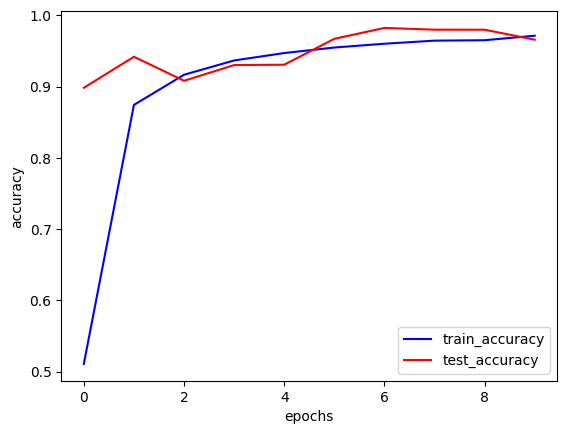

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'blue',label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'test_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

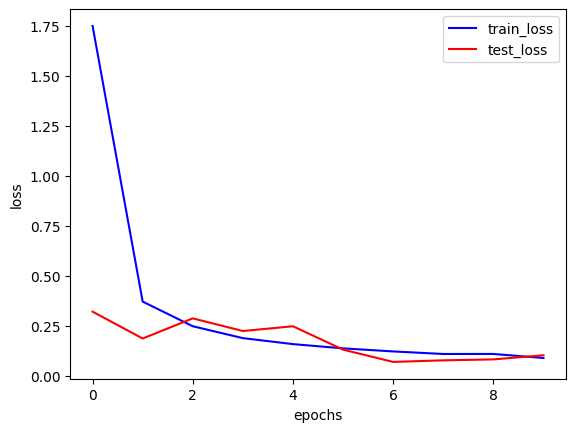

In [19]:
plt.plot(history.history['loss'],color = 'blue',label = 'train_loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'test_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

709/709 [==============================] - 43s 61ms/step


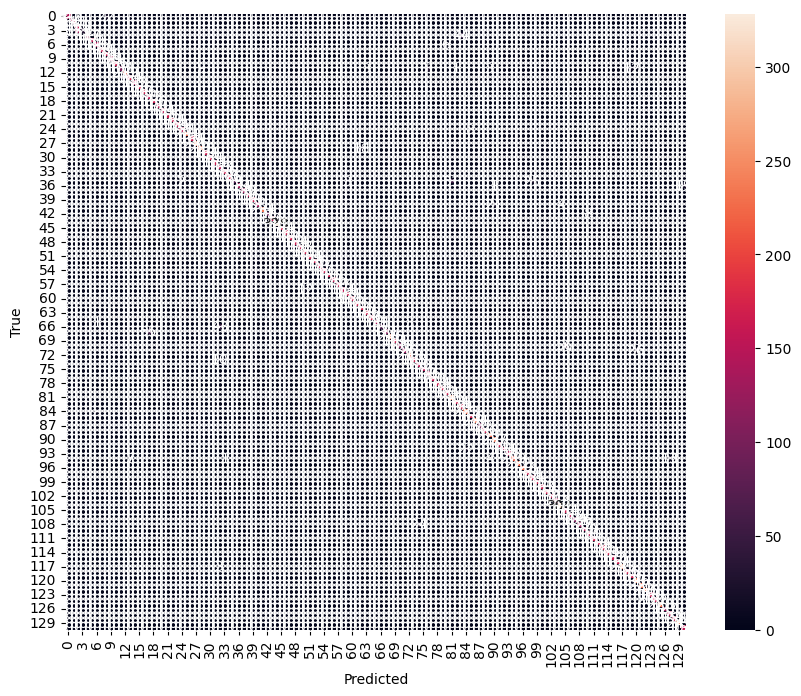

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       164
           1       1.00      1.00      1.00       148
           2       0.55      1.00      0.71       160
           3       1.00      0.20      0.34       164
           4       0.96      0.73      0.83       161
           5       1.00      0.97      0.98       164
           6       0.94      0.96      0.95       152
           7       1.00      1.00      1.00       164
           8       0.88      1.00      0.94       164
           9       1.00      1.00      1.00       144
          10       1.00      1.00      1.00       166
          11       1.00      0.62      0.77       164
          12       1.00      1.00      1.00       219
          13       0.96      1.00      0.98       164
          14       1.00      1.00      1.00       143
          15       1.00      1.00      1.00       166
          16       1.00      1.00      1.00       166
          17       0.73    

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


confusion_mtx = confusion_matrix(test_generator.classes, y_pred_classes)


plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print(classification_report(test_generator.classes, y_pred_classes))

In [23]:
test_loss ,test_acc = model.evaluate(test_generator)
print(f"test loss is {test_loss} and test accuracy is {test_acc}")

709/709 [==============================] - 45s 63ms/step - loss: 0.1036 - accuracy: 0.9658
test loss is 0.10362008213996887 and test accuracy is 0.9658409953117371


**We Have Got Higest Accuracy at epoch No 7 with test loss is 7% and test_accuracy of 98.24% where the training accuracy is also more than 96% 
But at minimum training loss test_loss is 0.1 and training_accuracy is 96.5%**

**ALEXNET ARCHETECTURE**

In [4]:
Image_size = 227

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range = 15,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')
                
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory ="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training",
    target_size = (Image_size,Image_size),
    shuffle = True,
    batch_size = 32,
    class_mode = 'sparse'
)

test_generator = test_datagen.flow_from_directory(
    directory ="/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test",
    target_size = (Image_size,Image_size),
    shuffle = False,
    batch_size = 32,
    class_mode = "sparse"
    
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [6]:


model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(Image_size,Image_size,3), kernel_size=(11,11),
 strides=(4,4), padding='valid',activation = 'relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid',activation = 'relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096,activation = 'relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096,activation = 'relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000,activation = 'relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(131,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                        

In [7]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'loss',patience = 5)

In [9]:
model.fit(train_generator,
         validation_data = test_generator,
         epochs = 10,
         callbacks = [es])

Epoch 1/10
2116/2116 [==============================] - 1265s 593ms/step - loss: 2.0306 - accuracy: 0.4172 - val_loss: 0.8139 - val_accuracy: 0.7439
Epoch 2/10
2116/2116 [==============================] - 918s 434ms/step - loss: 0.8757 - accuracy: 0.7147 - val_loss: 0.5794 - val_accuracy: 0.8270
Epoch 3/10
2116/2116 [==============================] - 916s 433ms/step - loss: 0.5728 - accuracy: 0.8131 - val_loss: 0.7152 - val_accuracy: 0.8106
Epoch 4/10
2116/2116 [==============================] - 910s 430ms/step - loss: 0.4277 - accuracy: 0.8585 - val_loss: 0.5383 - val_accuracy: 0.8580
Epoch 5/10
2116/2116 [==============================] - 901s 426ms/step - loss: 0.3323 - accuracy: 0.8899 - val_loss: 0.2942 - val_accuracy: 0.9119
Epoch 6/10
2116/2116 [==============================] - 896s 423ms/step - loss: 0.2752 - accuracy: 0.9096 - val_loss: 0.2473 - val_accuracy: 0.9355
Epoch 7/10
2116/2116 [==============================] - 883s 417ms/step - loss: 0.2265 - accuracy: 0.9258 - val

In [11]:
test_loss ,test_acc = model.evaluate(test_generator)
print(test_loss)
print(test_acc)

709/709 [==============================] - 61s 86ms/step - loss: 0.1269 - accuracy: 0.9721
0.12691433727741241
0.972099781036377


709/709 [==============================] - 47s 65ms/step


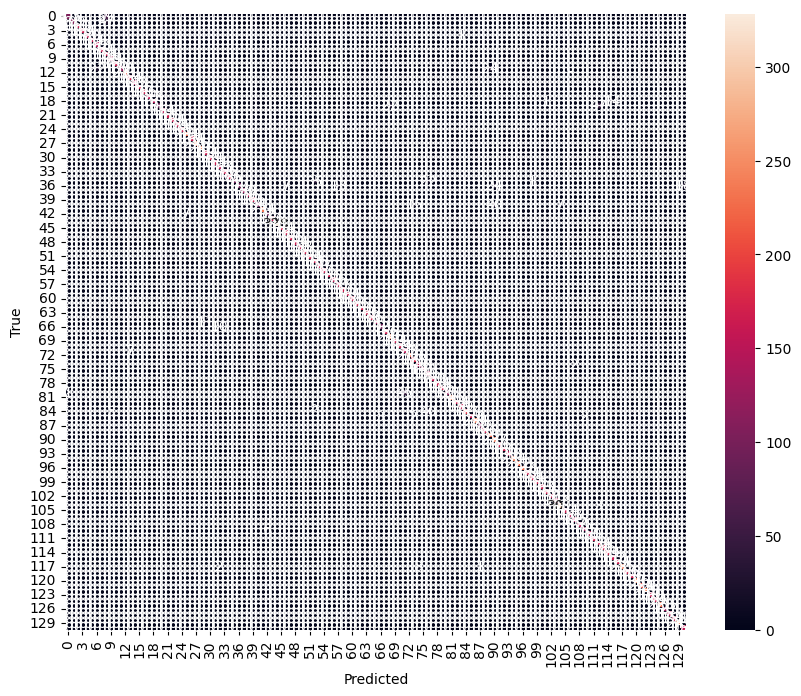

              precision    recall  f1-score   support

           0       0.92      0.64      0.76       164
           1       1.00      0.74      0.85       148
           2       1.00      1.00      1.00       160
           3       1.00      1.00      1.00       164
           4       1.00      0.99      1.00       161
           5       1.00      1.00      1.00       164
           6       0.87      1.00      0.93       152
           7       0.98      1.00      0.99       164
           8       0.66      1.00      0.79       164
           9       0.97      1.00      0.98       144
          10       1.00      1.00      1.00       166
          11       1.00      0.72      0.84       164
          12       1.00      0.96      0.98       219
          13       0.96      1.00      0.98       164
          14       1.00      1.00      1.00       143
          15       1.00      1.00      1.00       166
          16       1.00      1.00      1.00       166
          17       1.00    

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


confusion_mtx = confusion_matrix(test_generator.classes, y_pred_classes)


plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print(classification_report(test_generator.classes, y_pred_classes))

**We have got accuary of 97% by the help of alexnet architecture at the end of epochs = 10 and test loss is 0.12**